# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW1 - Optimization and Automatic Differentiation
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Gal Granot| gal.granot@campus.technion.ac.il | 315681593|
|Nir Tevet | nir.tevet@campus.technion.ac.il  | 208731422|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**.
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw1_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ece046211_hw1_id1_id2.zip` with content:
        * `ece046211_hw1_id1_id2.ipynb` - the code tasks
        * `ece046211_hw1_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/download">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw1` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---

* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Convergence of Gradient Descent](#-Question-1---Convergence-of-Gradient-Descent)
    * [Q2 - Optimization and Gradient Descent](#-Question-2---Optimization-and-Gradient-Descent)
    * [Q3 - Efficient Differentiation](#-Question-3---Efficient-Differentiation)
    * [Q4 - Autodiff](#-Question-4----Automatic-Differentiation)
* [Part 2 - Code Assignments](#-Part-2---Code-Assignments)
    * [Task 1 - The Beale Function](#-Task-1---The-Beale-Function)
    * [Task 2 - Building an Optimizer - Adam](#-Task-2---Building-an-Optimizer---Adam)
    * [Task 3 - PyTorch Autograd](#-Task-3---PyTorch-Autograd)
    * [Task 4 - Low Rank Matrix Factorization](#-Task-4---Low-Rank-Matrix-Factorization)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Convergence of Gradient Descent
---
Recall from the lecture notes:

* **Definition**: A function $f$ is $\beta$-smooth if: $$ \forall w_1, w_2 \in \mathbb{R}^d: ||\nabla f(w_1) - \nabla f(w_2)|| \leq \beta ||w_1 -w_2|| $$
* **Lemma**: If $f$ is $\beta$-smooth then $$ f(w_1) -f(w_2) -\nabla f(w_2)^T (w_1-w_2) \leq \frac{\beta}{2} ||w_1-w_2||^2 $$

Prove the lemma.

Hints:
* Represent $f$ as an integral: $f(x) − f(y) = \int_0^1 \nabla f(y + t(x-y))^T(x-y) dt $
* Make use of Cauchy-Schwarz.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Optimization and Gradient Descent
---
The function $f: \mathbb{R}^d \to \mathbb{R}$ is infinitely continuously differentiable, and satisfies $\min_{w \in \mathbb{R}^d} f(w)=f_{*}> -\infty$.

We wish to minimize this function using a version of Gradient Descent (GD) with step-size $\eta$, where in each iteration the gradients are multiplied by matrix $A$ $$ (*)\: w(t+1) = w(t) -\eta A\nabla f\left(w(t) \right).$$

Matrix $A$ is symmetric and strictly positive (positive definite with strictly positive eigenvalues), i.e., $\lambda_{min} \triangleq \lambda_{min}(A) >0$, and denote $\lambda_{max} \triangleq \lambda_{max}(A)$.

1. In section only assume that $f(w)=\frac{1}{2}w^THw$, where $H$ is strictly positive (positive definite with strictly positive eigenvalues). Find/choose $A$ and $\eta$ such that the algorithm $(*)$ converges in minimal number of steps. Why is that choice is infeasible when $d$ is large? What is a common applicable approximation?
2. Prove that Gradient Flow (i.e., GD in the limit $\eta \to 0$): $$ \dot{w}(t)=-A\nabla f \left(w(t ) \right) $$ converges to a critical point for all $f$ and $A$ that satisfy the conditions in the given question.
    * **Hint**: from the properties of eigenvalues it satifies that $\forall v\in\mathbb{R}^d: \lambda_{min}||v||^2\leq v^TAv\leq \lambda_{max}||v||^2$.
3. Given that the function $f$ is $\beta \text{-smooth}$, find a condition on the step-size $\eta$ such that we get convergence to a critical point in algorithm $(*)$. Prove convergence under this condition.
    * **Hint**: for a $\beta \text{-smooth}$ function, one can write: $$ f\left(w(t+1)\right) -  f\left(w(t)\right) \leq \left(w(t+1) -w(t) \right)^T\nabla f\left(w(t)\right) + \frac{\beta}{2} ||w(t+1) -w(t) ||^2$$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Efficient Differentiation
---
We wish to optimize a loss function $\mathcal{L}\left(\mathbf{w}\right)$ for  $\mathbf{w}\in\mathbb{R}^{d}$ using Gradient Descent (GD) with some step size schedule $\eta_{t}$
\begin{equation}
(1)\:\: \forall t=1,2,..:\mathbf{w}\left(t\right)=\mathbf{w}\left(t-1\right)-\eta_{t}\nabla\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)
\end{equation}
initialized from some $\mathbf{w}\left(0\right)$.
We would like to learn the best step size schedule using GD. **Hint**: throughout this question, you should use the *chain rule*.

1. Suppose we can consider each $\eta_{t}$ as a separate parameter for each $t$. We initialize this parameter with $\eta_{0}$ and update $\eta_{t-1}$ with a GD step on $\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$
\begin{equation}
(2)\:\:\eta_{t}=\eta_{t-1}-\alpha_{t}\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-1}}
\end{equation} for every step of eq. $(1)$, where $\alpha_{t}$ is the another step size. Calculate $\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)/\partial\eta_{t-1}$ as a function of the loss gradients $\nabla\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$ and $\nabla\mathcal{L}\left(\mathbf{w}\left(t-2\right)\right)$.
2. Now suppose we want to similarly update $\alpha_{t-1}$ using GD step on $\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$ every step of eq. $(2)$ with update step $\kappa_{t}$
\begin{equation}
\alpha_{t}=\alpha_{t-1}-\kappa_{t}\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\alpha_{t-1}}\,.
\end{equation} Calculate $\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)/\partial\alpha_{t-1}$ as a function of $\left\{ \nabla\mathcal{L}\left(\mathbf{w}\left(t-k\right)\right)\right\} _{k=1}^{3}$.
3. Now we wish to update $\left(\eta_{t-1},\eta_{t-2}\right)$ by doing a GD step on $\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$
\begin{equation}
(3)\:\:\left(\eta_{t+1},\eta_{t}\right)=\left(\eta_{t-1},\eta_{t-2}\right)-\alpha_{t}\left(\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-1}},\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-2}}\right)
\end{equation} every two steps of eq. $(1)$. Calculate the derivative $\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-2}}$  as a function of $\eta_{t-1}$, $\left\{ \nabla\mathcal{L}\left(\mathbf{w}\left(t-k\right)\right)\right\} _{k=1}^{3}$, and $\nabla^{2}\mathcal{L}\left(\mathbf{w}\left(t-2\right)\right)$.
4. Now we wish again to update $\left(\eta_{t},\eta_{t+1},...,\eta_{t+T}\right)$ by doing a GD step on $\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$ every $T$ steps of eq. $(1)$
\begin{equation}
(4)\:\:\left(\eta_{t+T},...,\eta_{t}\right)=\left(\eta_{t-1},...,\eta_{t-1-T}\right)-\alpha_{t}\left(\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-1}},...,\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-1-T}}\right)
\end{equation} Calculate the derivative $\frac{\partial\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)}{\partial\eta_{t-\tau}}$ as a function of $\left\{ \eta_{t-k},\nabla^{2}\mathcal{L}\left(\mathbf{w}\left(t-k-1\right)\right)\right\} _{k=1}^{\tau-1}$, $\nabla\mathcal{L}\left(\mathbf{w}\left(t-1\right)\right)$ and $\nabla\mathcal{L}\left(\mathbf{w}\left(t-\tau-1\right)\right)$.
5. Compare this approach (eq. $(4)$ with $T>1$) to the first one (eq. $(2)$). Name one advantage for each approach.
 Hints: Think of computional complexity, ease of optimization, suitability
 of the objective.

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 4 -  Automatic Differentiation
---

Consider the scalar function: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2) $$

1. Write down the derivative w.r.t. $x$ explicitly, i.e., $\frac{d f}{d x}$
2. We define the following intermediate variables: $$ a = \exp(x) $$ $$ b=a^2 $$ $$ c = a+b $$ $$ d=\exp(c) $$ $$ e=\sin(c) $$ $$ f=d+e $$ Draw a graph picturing the relationship between all variables (called the **computation graph**).
3. Using the graph, write down the derivatives of the individual terms, working backwards to compute the derivative of $f$ (i.e., write down the derivatives $\frac{df}{dd}, \frac{df}{de}, ..., \frac{df}{dx}$)

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of aall of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [11]:
# imports for the practice (you can add more if you need)
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from sklearn.datasets import load_iris


seed = 211
np.random.seed(seed)
torch.manual_seed(seed)
# %matplotlib notebook
%matplotlib inline

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1 - The Beale Function
---
The Beale function is defined as follows: $$ f(x, y) = (1.5 - x + xy)^{2} + (2.25 - x + xy^{2})^{2} + (2.625 - x +xy^{3})^{2}$$

1. What is the global minima of this function?
2. Implement the Beale function: `beale_f(x,y)`.
3. Implement a function, `beale_grads(x,y)` that returns the gradients of the Beale function.
4. 3D plot the Beale function wit the global minima you found. Use Matplotlib's `ax.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)` for the function, and `ax.plot(x, y, f(x, y), 'r*', markersize=20)` for the minima.
4. 2D plot the contours with `ax.contour(x_mesh, y_mesh, z, levels=np.logspace(-.5, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)` and the minima with `ax.plot(x, y, 'r*', markersize=20)`.

Your Answers Here

In [12]:
# Set the manually calculated minima
min_x = 3
min_y = 0.5

def beale_f(x, y):
    value = None
    """
    Your Code Here
    """
    value = (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3) ** 2
    return value

def beale_grads(x, y):
    dx, dy = None, None
    """
    Your Code Here
    """
    dx = 2 * (1.5 - x + x*y) * (-1 + y) + 2 * (2.25 - x + x*y**2) * (-1 + y**2) + 2 * (2.625 - x + x*y**3) * (-1 + y**3)
    dy = 2 * (1.5 - x + x*y) * x + 2 * (2.25 - x + x*y**2) * 2 * x * y + 2 * (2.625 - x + x*y**3) * 3 * x * y**2
    grads = np.array([dx, dy])
    return grads



In [13]:
minima = np.array([min_x, min_y])
beale_res = beale_f(*minima)
grads_res = beale_grads(*minima)
print(f"minima (1x2 row vector shape): {minima}")
print(f"beale_f output: {beale_res}")
print(f"beale_grad output: {grads_res}")

minima (1x2 row vector shape): [3.  0.5]
beale_f output: 0.0
beale_grad output: [-0.  0.]


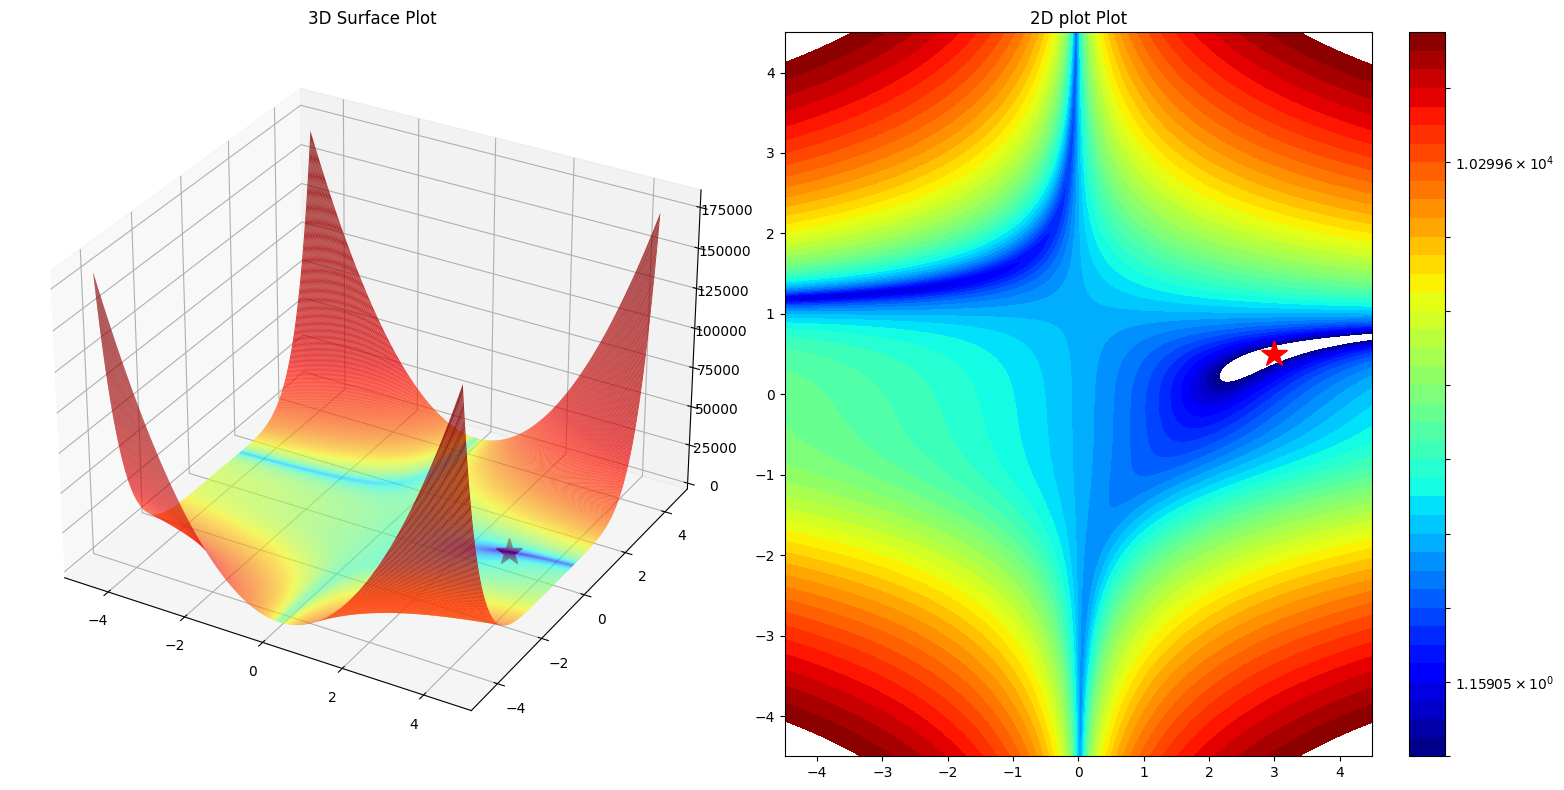

In [15]:

x_range = np.linspace(-4.5, 4.5, 400)
y_range = np.linspace(-4.5, 4.5, 400)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z = beale_f(x_mesh, y_mesh)

min_x, min_y = 3.0, 0.5
min_z = beale_f(min_x, min_y)

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x_mesh, y_mesh, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=0.8, cmap=plt.cm.jet)
ax1.plot([min_x], [min_y], [min_z], 'r*', markersize=20)
ax1.set_title('3D Surface Plot')

ax2 = fig.add_subplot(122)
levels = np.logspace(-0.5,5,40)
contour = ax2.contourf(x_mesh, y_mesh, z, levels=levels, cmap=plt.cm.jet, norm=LogNorm())
ax2.plot(min_x, min_y, 'r*', markersize=20)
ax2.set_title('2D plot Plot')

fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2 - Building an Optimizer - Adam
---
In this task, you are going to implement the Adam optimizer. We are giving the skeleton of the code and the description of the methods, and you need to implement the optimizer.

Recall the Adam update rule:
$$ m_{k+1} = \beta_1 m_k + (1-\beta_1)\nabla f(w^k) = \beta_1 m_k + (1-\beta_1)g_k $$  $$ v_{k+1} = \beta_2 v_k + (1-\beta_2)(\nabla f(w^k))^2 = \beta_2 v_k + (1-\beta_2)g^2_k $$ Then, they use an **unbiased** estimation: $$ \hat{m}_{k+1} = \frac{m_{k+1}}{1 -\beta_1^{k+1}} $$ $$ \hat{v}_{k+1} = \frac{v_{k+1}}{1 -\beta_2^{k+1}} $$ (the $\beta$'s are taken with the power of the current iteration) $$ w_{k+1} = w_k -\frac{\alpha}{\sqrt{\hat{v}_{k+1}} +\epsilon}\hat{m}_{k+1} $$

* $\epsilon$ deafult's is $10^{-8}$


1. Implement `class AdamOptimizer()`.
    * `function` is the Python function you want to optimize.
    * `gradients` is the Python function that returns the gradients of `function`.
    * `x_init` and `y_init` are the initialization points for the optimizer.
    * Save the `path` of the optimizer (the minima points the optimizer visits during the optimization).
    * Stopping criterion: change in minima `<1e-7`.
    * **You can change the class however you wish, you can remove/add variables and methods as you wish**
2. For ` x_init=0.7, y_init=1.4, learning_rate=0.1, beta1=0.9, beta2=0.999`, optimize the Beale function. Plot the results **with the path taken** (better do it on the 2D contour plot).
3. Choose different initialization and learning rate and show the results as in 2.

In [18]:
class AdamOptimizer():
    def __init__(self, function, gradients, x_init=None, y_init=None,
                 learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.f = function
        self.g = gradients
        scale = 3.0
        self.current_val = np.zeros([2])
        if x_init is not None:
            self.current_val[0] = x_init
        else:
            self.current_val[0] = np.random.uniform(low=-scale, high=scale)
        if y_init is not None:
            self.current_val[1] = y_init
        else:
            self.current_val[1] = np.random.uniform(low=-scale, high=scale)
        print("x_init: {:.3f}".format(self.current_val[0]))
        print("y_init: {:.3f}".format(self.current_val[1]))

        self.lr = learning_rate
        self.grads_first_moment = np.zeros([2])
        self.grads_second_moment = np.zeros([2])
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        # for accumulation of loss and path (w, b)
        self.z_history = []
        self.x_history = []
        self.y_history = []


    def func(self, variables):
        """Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          z: Beale function value at (x, y)
        """
        x, y = variables
        return self.f(x, y)

    def gradients(self, variables):
        """Gradient of Beale function.

        Args:
          variables: input data, shape: 1-rank Tensor (vector) np.array
            x: x-dimension of inputs
            y: y-dimension of inputs

        Returns:
          grads: [dx, dy], shape: 1-rank Tensor (vector) np.array
            dx: gradient of Beale function with respect to x-dimension of inputs
            dy: gradient of Beale function with respect to y-dimension of inputs
        """
        x, y = variables
        return self.g(x,y)


    def weights_update(self, grads, time):
        """Weights update using Adam.

          g1 = beta1 * g1 + (1 - beta1) * grads
          g2 = beta2 * g2 + (1 - beta2) * grads ** 2
          g1_unbiased = g1 / (1 - beta1**time)
          g2_unbiased = g2 / (1 - beta2**time)
          w = w - lr * g1_unbiased / (sqrt(g2_unbiased) + epsilon)
        """
        self.grads_first_moment = self.beta1 * self.grads_first_moment + (1 - self.beta1) * grads
        self.grads_second_moment = self.beta2 * self.grads_second_moment + (1 - self.beta2) * (grads ** 2)
        m_hat = self.grads_first_moment / (1 - self.beta1 ** time)
        v_hat = self.grads_second_moment / (1 - self.beta2 ** time)
        self.current_val -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

    def history_update(self, z, x, y):
        """Accumulate all interesting variables
        """
        self.z_history.append(z)
        self.x_history.append(x)
        self.y_history.append(y)


    def train(self, max_steps):
        time = 0
        for step in range(max_steps):
            time += 1
            current_z = self.func(self.current_val)
            grads = self.gradients(self.current_val)
            self.weights_update(grads, time)
            self.history_update(current_z, self.current_val[0], self.current_val[1])

            if step > 0 and np.linalg.norm(np.array([self.x_history[-1], self.y_history[-1]]) - np.array([self.x_history[-2], self.y_history[-2]])) < 1e-7:
                break

        return self.current_val

    def plot_results(self):
        x = np.linspace(-4.5, 4.5, 400)
        y = np.linspace(-4.5, 4.5, 400)
        X, Y = np.meshgrid(x, y)
        Z = self.func(np.array([X, Y]))

        plt.figure(figsize=(8, 6))
        plt.contour(X, Y, Z, levels=np.logspace(-0.5, 5, 35), cmap='viridis')
        plt.plot(self.x_history, self.y_history, 'ro-', markersize=3, linewidth=1)
        plt.title('Adam Optimization Path on Beale Function')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.colorbar()
        plt.show()


In [19]:
opt = AdamOptimizer(beale_f, beale_grads, x_init=0.7, y_init=1.4, learning_rate=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8)

x_init: 0.700
y_init: 1.400


In [20]:
%time
opt.train(1000)
print("Global minima")
print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
print("Solution using the gradient descent")
print("x: {:.4f}  y: {:.4f}".format(opt.current_val[0], opt.current_val[1]))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Global minima
x*: 3.00  y*: 0.50
Solution using the gradient descent
x: 3.0000  y: 0.5000


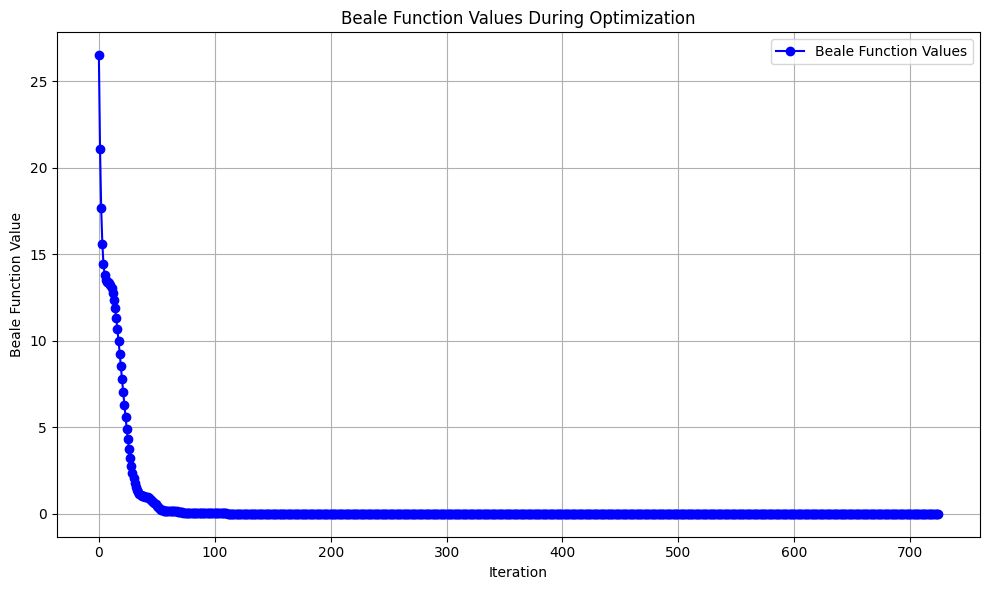

In [25]:
# plot the Beale function values during the optimization
plt.figure(figsize=(10, 6))
plt.plot(range(len(opt.z_history)), opt.z_history, marker='o', linestyle='-', color='b', label='Beale Function Values')
plt.xlabel('Iteration')
plt.ylabel('Beale Function Value')
plt.title('Beale Function Values During Optimization')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

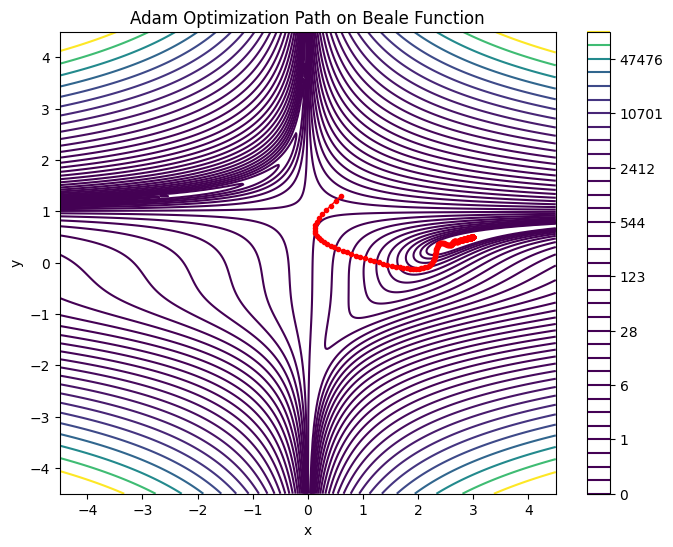

In [ ]:
# plot the optimization path
opt.plot_results()

x_init: 4.000
y_init: 4.000
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Global minima
x*: 3.00  y*: 0.50
Solution using the gradient descent
x: 3.0000  y: 0.5000


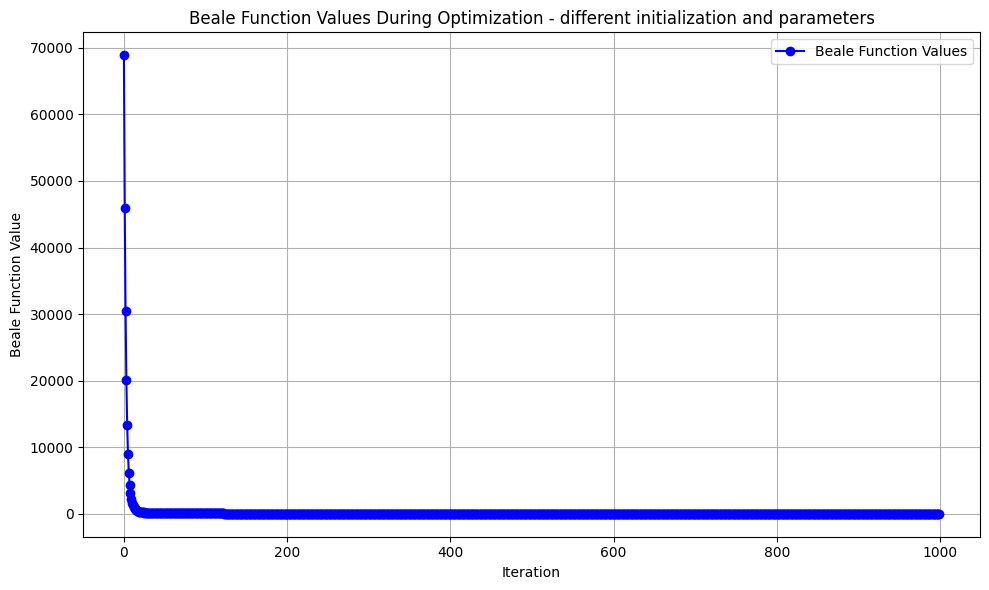

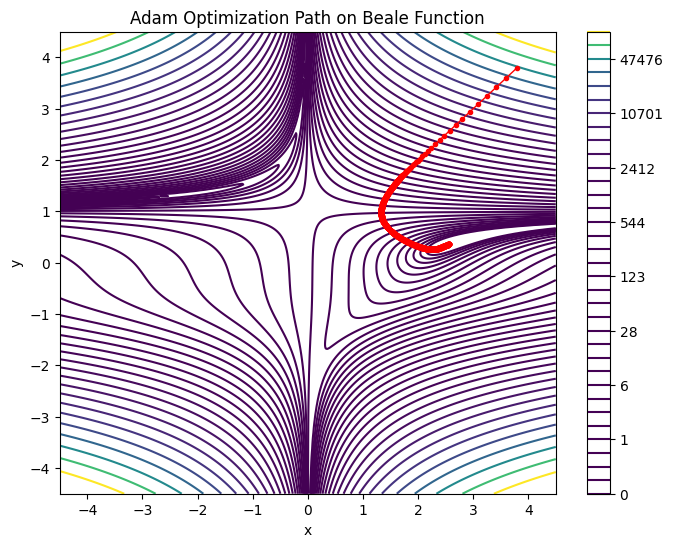

In [37]:
#3 - different initialization and parameters
opt2 = AdamOptimizer(beale_f, beale_grads, x_init=4, y_init=4, learning_rate=0.2, beta1=0.85, beta2=0.99, epsilon=1e-8)

%time
opt2.train(1000)
print("Global minima")
print("x*: {:.2f}  y*: {:.2f}".format(minima[0], minima[1]))
print("Solution using the gradient descent")
print("x: {:.4f}  y: {:.4f}".format(opt.current_val[0], opt.current_val[1]))

# plot the Beale function values during the optimization
plt.figure(figsize=(10, 6))
plt.plot(range(len(opt2.z_history)), opt2.z_history, marker='o', linestyle='-', color='b', label='Beale Function Values')
plt.xlabel('Iteration')
plt.ylabel('Beale Function Value')
plt.title('Beale Function Values During Optimization - different initialization and parameters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# plot the optimization path
opt2.plot_results()

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3 - PyTorch Autograd
---
For the function from the theory practice: $$ f = \exp(\exp(x) + \exp(x)^2) +\sin(\exp(x) + \exp(x)^2)  $$

1. Implement it and its dervative (explicitly) using `torch`.
2. Define a scalar tensor `x` and use `autograd` to calculate the derivative w.r.t $x$. Does the result correspond to the output of the function the calculates the derivative explicitly?

In [31]:
def f(x):
    f_val = None
    """
    Your Code Here
    """
    f_val = torch.exp(torch.exp(x) + torch.exp(x)**2) + torch.sin(torch.exp(x) + torch.exp(x)**2)
    return f_val

def derv_f(x):
    """
    Compute the derivative f'(x)
    """
    g = torch.exp(x) + torch.exp(x)**2
    dg_dx = torch.exp(x) + 2 * torch.exp(2 * x)
    derv_val = (torch.exp(g) + torch.cos(g)) * dg_dx
    return derv_val

In [32]:
x = torch.tensor(0.5, requires_grad=True)
print(x)
f_res = f(x)
f_manual_grad = derv_f(x.detach())

"""
Your Code Here
"""
# Calculate with torch autograd
f_autograd = torch.autograd.grad(f_res, x)


print(f_manual_grad)
print(f_autograd)

tensor(0.5000, requires_grad=True)
tensor(555.9719)
(tensor(555.9719),)


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4 - Low Rank Matrix Factorization
---
Consider the following optimization problem: $$ \min_{\hat{U}, \hat{V}}||A - \hat{U}\hat{V}||_F^{2} $$ Where $A \in \mathcal{R}^{m \times n},\hat{U} \in \mathcal{R}^{m \times r}, \hat{V} \in \mathcal{R}^{r \times n} $ and $r < min(m,n)$ ($r$ is the rank of the matrix). $||\cdot||_F^2$ denotes the Frobenius norm.

1. Implement a function, `gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01)`, that given a 2D tensor `A` and a `rank`, will calculate the low-rank factorization of `A` using **gradient decsent**. Compute and apply all the gradients of $\hat{U}$ and of $\hat{V}$ once per epoch. $\hat{U}$ and $\hat{V}$ should be initially created with uniform random values. Use PyTorch's `autograd` for the gradients.
    * To compute the squared Frobenius norm loss (reconstruction loss), use `torch.nn.functional.mse loss with reduction=’sum’`.

2. Use the provided `data` of the Iris dataset of 150 instances and 4 features. Apply `gd_factorize_ad` to compute the 2-rank matrix factorization of `data`. What is the reconstruction loss?

In [33]:
import torch.nn.functional as F

df = load_iris(as_frame=True).data # option 1
# df = pd.read_csv('./iris.data', header=None) # option 2
data = torch.tensor(df.iloc[:, [0, 1, 2, 3]].values)
data = data - data.mean(dim=0)

In [35]:
def gd_factorize_ad(A, rank, num_epochs=1000, lr=0.01):
    # initialize
    U = None
    V = None

    """
    Your Code Here
    """

    m, n = A.shape
    U = torch.randn((m, rank), requires_grad=True)
    V = torch.randn((rank, n), requires_grad=True)

    optimizer = torch.optim.SGD([U, V], lr=lr)

    for epoch in range(num_epochs):

        optimizer.zero_grad()
        A_approx = torch.matmul(U, V)
        loss = F.mse_loss(A_approx, A, reduction='sum')
        loss.backward()
        with torch.no_grad():
            U -= lr * U.grad
            V -= lr * V.grad
            U.grad.zero_()
            V.grad.zero_()

        if epoch % 5 == 0:
            print(f'epoch: {epoch}, loss: {loss}')
    return U, V

In [36]:
U, V = gd_factorize_ad(data.float(), rank=2, num_epochs=1000, lr=0.01)

epoch: 0, loss: 1925.9737548828125
epoch: 5, loss: 125.23800659179688
epoch: 10, loss: 53.50729751586914
epoch: 15, loss: 45.11131286621094
epoch: 20, loss: 42.19950485229492
epoch: 25, loss: 40.081207275390625
epoch: 30, loss: 37.77248001098633
epoch: 35, loss: 35.052886962890625
epoch: 40, loss: 31.980606079101562
epoch: 45, loss: 28.76905059814453
epoch: 50, loss: 25.696773529052734
epoch: 55, loss: 23.002962112426758
epoch: 60, loss: 20.81544303894043
epoch: 65, loss: 19.14505958557129
epoch: 70, loss: 17.926401138305664
epoch: 75, loss: 17.064979553222656
epoch: 80, loss: 16.46854019165039
epoch: 85, loss: 16.060794830322266
epoch: 90, loss: 15.78405475616455
epoch: 95, loss: 15.596899032592773
epoch: 100, loss: 15.470483779907227
epoch: 105, loss: 15.385072708129883
epoch: 110, loss: 15.32730484008789
epoch: 115, loss: 15.28817081451416
epoch: 120, loss: 15.261613845825195
epoch: 125, loss: 15.243558883666992
epoch: 130, loss: 15.231261253356934
epoch: 135, loss: 15.2228736877441

In [ ]:
# print(f"matrix A: {data.float()}")
# print(f" U@V = {np.matmul(U.detach(),V.detach())}")

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/